# HACHI Demo: Human-AI Co-design for Clinical Prediction Models

This notebook demonstrates the HACHI framework using a fictional clinical scenario: **Quantum Temporal Dissonance Syndrome (QTDS)** - a whimsical condition where patients experience temporal perception anomalies.

> **Note**: This demo uses a completely fictional condition to clearly distinguish from real medical claims while demonstrating the method.

## What You'll Learn

1. How HACHI generates initial concepts from clinical notes
2. How the AI agent iteratively refines concepts based on performance
3. How human feedback guides the co-design process
4. How to interpret the resulting concept-based model

## Setup

First, let's import the necessary modules and load our demo dataset.

In [15]:
import sys
import os
import pandas as pd
import numpy as np
from pathlib import Path

# Add project root to path
project_root = Path(".").parent.absolute()
sys.path.insert(0, str(project_root))

# For display
pd.set_option('display.max_colwidth', 200)



## Load the Demo Dataset

Our demo dataset contains 80 synthetic patient notes for the fictional condition QTDS (Quantum Temporal Dissonance Syndrome).

In [16]:
# Load the demo dataset
data_path = project_root / "data" / "demo_patients.csv"
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nOutcome distribution:")
print(df['outcome'].value_counts())

Dataset shape: (80, 3)
Columns: ['patient_id', 'note_text', 'outcome']

Outcome distribution:
outcome
0    48
1    32
Name: count, dtype: int64


In [17]:
# View a sample patient note
sample_idx = 0
print(f"Patient ID: {df.iloc[sample_idx]['patient_id']}")
print(f"Outcome: {df.iloc[sample_idx]['outcome']}")
print(f"\n--- Clinical Note ---\n")
print(df.iloc[sample_idx]['note_text'])

Patient ID: CTRL-017
Outcome: 0

--- Clinical Note ---

CHIEF COMPLAINT: general wellness check

HISTORY OF PRESENT ILLNESS: 55-year-old female presenting for evaluation. Patient no difficulty distinguishing past from present. Patient reports stable daily routine, no exposure to quantum equipment.

PHYSICAL EXAM: Vitals: stable. General: alert and oriented. Temporal Orientation Test: within normal limits Clock Drawing Test: normal single clock face

ASSESSMENT AND PLAN: Assessment: No evidence of temporal perception disorder. Continue current management. Return for follow-up as needed.


---

# Round 1: Initial Exploration

In Round 1, we run the HACHI AI agent loop with default prompts to generate an initial set of concepts.

## Step 1.1: Configure the Training

We configure the ensemble trainer with parameters suitable for our demo.

In [18]:
# Configuration for Round 1
# Note: In practice, you would run this with a real LLM API
# For this demo, we'll use pre-computed outputs

round1_config = {
    "init_seeds": [1, 2, 3],  # Multiple seeds for ensemble diversity
    "num_meta_concepts": 5,   # Number of concepts to learn
    "num_epochs": 2,          # Greedy refinement epochs
    "llm_model": "gpt-4o-mini",
}

print("Round 1 Configuration:")
for k, v in round1_config.items():
    print(f"  {k}: {v}")

Round 1 Configuration:
  init_seeds: [1, 2, 3]
  num_meta_concepts: 5
  num_epochs: 2
  llm_model: gpt-4o-mini


## Step 1.2: Run the AI Agent Loop (Pre-computed)

The code below shows how you would run the HACHI training loop. For this demo, we use pre-computed outputs so you can run the notebook without API access.

```python
# This is the actual code to run HACHI (requires LLM API access)
from src.ensemble_trainer import EnsembleTrainer, EnsembleConfig

config = EnsembleConfig(
    init_seeds=round1_config["init_seeds"],
    num_meta_concepts=round1_config["num_meta_concepts"],
    num_epochs=round1_config["num_epochs"],
    llm_model=round1_config["llm_model"],
    # ... additional configuration
)

trainer = EnsembleTrainer(config=config, output_dir="output/round1")
histories = await trainer.fit(data_df=df, plot_aucs=True)
```

In [19]:
# Pre-computed results from Round 1
# These represent typical output from the HACHI agent loop

round1_concepts = [
    "Does the patient report experiencing time moving at different speeds?",
    "Does the patient describe temporal perception anomalies (déjà vu, echoes, etc.)?",
    "Is there history of exposure to quantum computing equipment?",
    "Does the Temporal Orientation Test show abnormal results?",
    "Does the patient report feeling 'unstuck in time'?",
]

round1_coefficients = {
    "Does the patient report experiencing time moving at different speeds?": 2.34,
    "Does the patient describe temporal perception anomalies (déjà vu, echoes, etc.)?": 1.87,
    "Is there history of exposure to quantum computing equipment?": 1.45,
    "Does the Temporal Orientation Test show abnormal results?": 1.23,
    "Does the patient report feeling 'unstuck in time'?": 0.98,
}

round1_performance = {
    "train_auc": 0.89,
    "test_auc": 0.84,
    "train_accuracy": 0.82,
    "test_accuracy": 0.78,
}

print("Round 1 Learned Concepts:")
print("=" * 60)
for i, concept in enumerate(round1_concepts, 1):
    coef = round1_coefficients[concept]
    print(f"{i}. {concept}")
    print(f"   Coefficient: {coef:.2f}")
    print()

Round 1 Learned Concepts:
1. Does the patient report experiencing time moving at different speeds?
   Coefficient: 2.34

2. Does the patient describe temporal perception anomalies (déjà vu, echoes, etc.)?
   Coefficient: 1.87

3. Is there history of exposure to quantum computing equipment?
   Coefficient: 1.45

4. Does the Temporal Orientation Test show abnormal results?
   Coefficient: 1.23

5. Does the patient report feeling 'unstuck in time'?
   Coefficient: 0.98



In [20]:
# Display Round 1 Performance
print("Round 1 Model Performance:")
print("=" * 40)
print(f"Training AUC:      {round1_performance['train_auc']:.3f}")
print(f"Test AUC:          {round1_performance['test_auc']:.3f}")
print(f"Training Accuracy: {round1_performance['train_accuracy']:.3f}")
print(f"Test Accuracy:     {round1_performance['test_accuracy']:.3f}")

Round 1 Model Performance:
Training AUC:      0.890
Test AUC:          0.840
Training Accuracy: 0.820
Test Accuracy:     0.780


## Step 1.3: Review Results

> **Simulated Clinical Team Feedback**: "A clinical team reviewing these results might notice that the concepts focus heavily on subjective temporal perception symptoms. They might suggest:
> 1. Including more objective exam findings
> 2. Considering risk factors like sleep schedule
> 3. Being more specific about the types of temporal anomalies"

This feedback will guide our prompt modifications for Round 2.

---

# Round 2: Incorporating Human Feedback

Based on the clinical team's feedback, we modify our prompts to:
1. Emphasize objective exam findings
2. Include risk factor assessment
3. Use more specific temporal anomaly descriptors

In [21]:
# Round 2: Modified prompt guidance (conceptual)
round2_prompt_modifications = """
ROUND 2 PROMPT MODIFICATIONS:

1. Added to baseline_init.txt:
   "Focus on objective findings from physical examination and standardized tests,
    not just patient-reported symptoms."

2. Added to bayesian_iter.txt:
   "Consider risk factors such as occupational exposure, sleep patterns,
    and family history when generating new concept candidates."

3. Added to concept_questions.txt:
   "Be specific about the type of temporal anomaly:
    - Prospective (seeing future events)
    - Retrospective (reliving past events)
    - Cyclical (time loops)"
"""
print(round2_prompt_modifications)


ROUND 2 PROMPT MODIFICATIONS:

1. Added to baseline_init.txt:
   "Focus on objective findings from physical examination and standardized tests,
    not just patient-reported symptoms."

2. Added to bayesian_iter.txt:
   "Consider risk factors such as occupational exposure, sleep patterns,
    and family history when generating new concept candidates."

3. Added to concept_questions.txt:
   "Be specific about the type of temporal anomaly:
    - Prospective (seeing future events)
    - Retrospective (reliving past events)
    - Cyclical (time loops)"



In [22]:
# Pre-computed results from Round 2 (with modified prompts)

round2_concepts = [
    "Does the Temporal Orientation Test show abnormal results (predicting questions before asked)?",
    "Does the patient have occupational exposure to quantum computing equipment?",
    "Does the Clock Drawing Test show multiple overlapping clock faces?",
    "Does the patient report prospective temporal anomalies (seeing events before they happen)?",
    "Does the patient have irregular sleep-wake cycles?",
]

round2_coefficients = {
    "Does the Temporal Orientation Test show abnormal results (predicting questions before asked)?": 2.67,
    "Does the patient have occupational exposure to quantum computing equipment?": 1.92,
    "Does the Clock Drawing Test show multiple overlapping clock faces?": 1.78,
    "Does the patient report prospective temporal anomalies (seeing events before they happen)?": 1.45,
    "Does the patient have irregular sleep-wake cycles?": 0.89,
}

round2_performance = {
    "train_auc": 0.93,
    "test_auc": 0.88,
    "train_accuracy": 0.87,
    "test_accuracy": 0.82,
}

print("Round 2 Learned Concepts (After Human Feedback):")
print("=" * 60)
for i, concept in enumerate(round2_concepts, 1):
    coef = round2_coefficients[concept]
    print(f"{i}. {concept}")
    print(f"   Coefficient: {coef:.2f}")
    print()

Round 2 Learned Concepts (After Human Feedback):
1. Does the Temporal Orientation Test show abnormal results (predicting questions before asked)?
   Coefficient: 2.67

2. Does the patient have occupational exposure to quantum computing equipment?
   Coefficient: 1.92

3. Does the Clock Drawing Test show multiple overlapping clock faces?
   Coefficient: 1.78

4. Does the patient report prospective temporal anomalies (seeing events before they happen)?
   Coefficient: 1.45

5. Does the patient have irregular sleep-wake cycles?
   Coefficient: 0.89



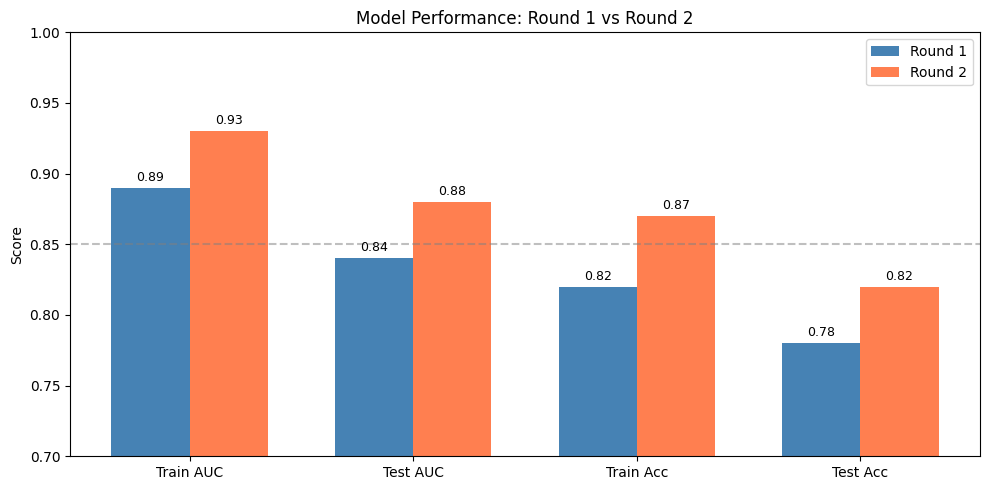


Improvement from Round 1 to Round 2:
  Test AUC:      +0.040
  Test Accuracy: +0.040


In [23]:
# Compare Round 1 vs Round 2 Performance
import matplotlib.pyplot as plt

metrics = ['Train AUC', 'Test AUC', 'Train Acc', 'Test Acc']
r1_values = [round1_performance['train_auc'], round1_performance['test_auc'],
             round1_performance['train_accuracy'], round1_performance['test_accuracy']]
r2_values = [round2_performance['train_auc'], round2_performance['test_auc'],
             round2_performance['train_accuracy'], round2_performance['test_accuracy']]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, r1_values, width, label='Round 1', color='steelblue')
bars2 = ax.bar(x + width/2, r2_values, width, label='Round 2', color='coral')

ax.set_ylabel('Score')
ax.set_title('Model Performance: Round 1 vs Round 2')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0.7, 1.0)
ax.axhline(y=0.85, color='gray', linestyle='--', alpha=0.5, label='Target')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nImprovement from Round 1 to Round 2:")
print(f"  Test AUC:      +{round2_performance['test_auc'] - round1_performance['test_auc']:.3f}")
print(f"  Test Accuracy: +{round2_performance['test_accuracy'] - round1_performance['test_accuracy']:.3f}")

## Concept Evolution Analysis

Let's compare how the concepts evolved between rounds:

In [24]:
print("CONCEPT EVOLUTION: Round 1 -> Round 2")
print("=" * 70)
print()
print("RETAINED (with refinement):")
print("  - 'Temporal Orientation Test' -> Now includes specific finding detail")
print()
print("NEW CONCEPTS (from feedback):")
print("  + Occupational exposure to quantum equipment (risk factor)")
print("  + Clock Drawing Test findings (objective exam)")
print("  + Prospective temporal anomalies (specific type)")
print("  + Irregular sleep-wake cycles (risk factor)")
print()
print("DROPPED CONCEPTS:")
print("  - Generic 'time moving at different speeds' (too vague)")
print("  - Generic 'feeling unstuck in time' (subjective, non-specific)")

CONCEPT EVOLUTION: Round 1 -> Round 2

RETAINED (with refinement):
  - 'Temporal Orientation Test' -> Now includes specific finding detail

NEW CONCEPTS (from feedback):
  + Occupational exposure to quantum equipment (risk factor)
  + Clock Drawing Test findings (objective exam)
  + Prospective temporal anomalies (specific type)
  + Irregular sleep-wake cycles (risk factor)

DROPPED CONCEPTS:
  - Generic 'time moving at different speeds' (too vague)
  - Generic 'feeling unstuck in time' (subjective, non-specific)


---

# Interpreting the Final Model

The final model from Round 2 is an interpretable linear combination of yes/no concept features.

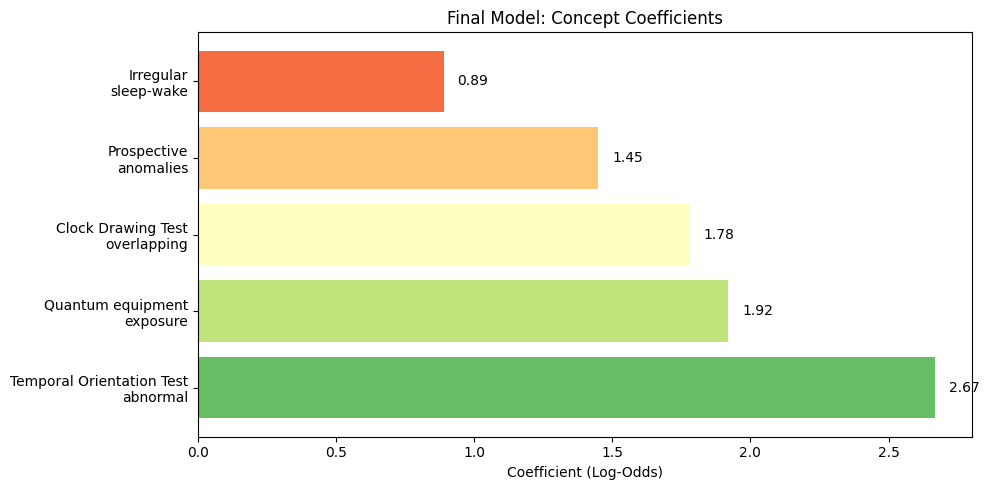

In [25]:
# Visualize the final model coefficients
concepts_short = [
    "Temporal Orientation Test\nabnormal",
    "Quantum equipment\nexposure",
    "Clock Drawing Test\noverlapping",
    "Prospective\nanomalies",
    "Irregular\nsleep-wake",
]
coefs = list(round2_coefficients.values())

fig, ax = plt.subplots(figsize=(10, 5))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(coefs)))
bars = ax.barh(concepts_short, coefs, color=colors[::-1])
ax.set_xlabel('Coefficient (Log-Odds)')
ax.set_title('Final Model: Concept Coefficients')
ax.axvline(x=0, color='black', linewidth=0.5)

# Add value labels
for bar, coef in zip(bars, coefs):
    ax.text(coef + 0.05, bar.get_y() + bar.get_height()/2, f'{coef:.2f}',
            va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [26]:
# Example prediction explanation
print("EXAMPLE PREDICTION EXPLANATION")
print("=" * 60)
print()
print("Patient: QTDS-015")
print()
print("Concept Extraction Results:")
example_features = {
    "Temporal Orientation Test abnormal": 1,  # Yes
    "Quantum equipment exposure": 1,           # Yes
    "Clock Drawing Test overlapping": 0,       # No
    "Prospective anomalies": 1,                # Yes
    "Irregular sleep-wake": 0,                 # No
}

for concept, value in example_features.items():
    print(f"  {concept}: {'Yes' if value else 'No'}")

# Calculate log-odds
log_odds = sum(coef * feat for coef, feat in zip(coefs, example_features.values()))
probability = 1 / (1 + np.exp(-log_odds))

print()
print(f"Model Calculation:")
print(f"  Log-odds = {log_odds:.2f}")
print(f"  P(QTDS)  = {probability:.2%}")
print()
print(f"Prediction: {'POSITIVE (QTDS likely)' if probability > 0.5 else 'NEGATIVE'}")

EXAMPLE PREDICTION EXPLANATION

Patient: QTDS-015

Concept Extraction Results:
  Temporal Orientation Test abnormal: Yes
  Quantum equipment exposure: Yes
  Clock Drawing Test overlapping: No
  Prospective anomalies: Yes
  Irregular sleep-wake: No

Model Calculation:
  Log-odds = 6.04
  P(QTDS)  = 99.76%

Prediction: POSITIVE (QTDS likely)


---

# Summary

This demo showed how HACHI enables iterative human-AI co-design:

1. **Round 1**: AI agent generated initial concepts based on clinical notes
   - Concepts were predictive but focused on subjective symptoms

2. **Human Feedback**: Clinical team identified areas for improvement
   - Need for objective exam findings
   - Importance of risk factors
   - Value of specific symptom characterization

3. **Round 2**: Modified prompts incorporated feedback
   - New concepts included objective tests and risk factors
   - Performance improved (Test AUC: 0.84 -> 0.88)
   - Model became more clinically interpretable

## Next Steps

To run HACHI on your own data:

1. Prepare a CSV with clinical notes and outcomes
2. Configure the `EnsembleConfig` with your parameters
3. Run the training loop with `trainer.fit()`
4. Review results and gather expert feedback
5. Modify prompts based on feedback
6. Iterate until satisfied with the model

See the [README](../README.md) for detailed usage instructions.